In [3]:
# Fashion-MNIST 데이터셋 다운받기

from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운 받습니다.
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


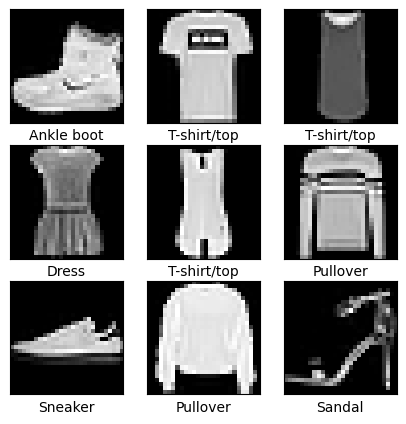

In [4]:
# 데이터 그려보기

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [5]:
# 전처리 및 검증 데이터셋 만들기

# 0~1 범위로 만듭니다.
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)


In [6]:
# 첫 번째 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
first_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> (28 * 28)
first_model.add(Dense(64, activation = 'relu'))     # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation = 'relu'))     # 32개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation = 'softmax'))  # 10개의 출력을 가지는 신경망


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 학습 과정 설정 및 학습하기

first_model.compile(optimizer='adam',   # 옵티마이저: Adam
                    # 손실함수: categorical_crossentropy
                    loss = 'categorical_crossentropy',
                    # 모니터링 할 평가지표: acc
                    metrics=['acc'])

first_hitory = first_model.fit(x_train, y_train, 
                               epochs = 30,
                               batch_size = 128,
                               validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.6783 - loss: 0.9540 - val_acc: 0.8398 - val_loss: 0.4721
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8420 - loss: 0.4582 - val_acc: 0.8466 - val_loss: 0.4495
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8516 - loss: 0.4166 - val_acc: 0.8567 - val_loss: 0.4068
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8645 - loss: 0.3857 - val_acc: 0.8646 - val_loss: 0.3877
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8692 - loss: 0.3666 - val_acc: 0.8639 - val_loss: 0.3795
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8766 - loss: 0.3456 - val_acc: 0.8704 - val_loss: 0.3660
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8820 - loss: 0.3314 - val_acc: 0.8751 - val_loss: 0.3525
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8849 - loss: 0.3200 - val_acc: 0.8724 - val_loss: 0.3639
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [9]:
# 두 번째 모델 구성하기

second_model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape = (28, 28)))   # (28, 28) -> (28 * 28
# 128개의 출력을 가지는 Dense층을 추가합니다.
second_model.add(Dense(128, activation = 'relu'))
# 64개의 출력을 가지는 Dense층을 추가합니다.
second_model.add(Dense(64, activation = 'relu'))
# 32개의 출력을 가지는 Dense층을 추가합니다.
second_model.add(Dense(32, activation = 'relu'))
# 10개의 출력을 가지는 Dense층을 추가합니다.
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(optimizer = 'adam', # 옵티마이저: Adam
                     loss = 'categorical_crossentropy', # 손실 함수: categorical_crossentropy
                     metrics = ['acc']) # 모니터링 할 평가지표: acc

second_history = second_model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6924 - loss: 0.9221 - val_acc: 0.8514 - val_loss: 0.4382
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8436 - loss: 0.4339 - val_acc: 0.8562 - val_loss: 0.4077
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8609 - loss: 0.3873 - val_acc: 0.8639 - val_loss: 0.3783
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8739 - loss: 0.3453 - val_acc: 0.8748 - val_loss: 0.3511
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8837 - loss: 0.3228 - val_acc: 0.8789 - val_loss: 0.3409
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8858 - loss: 0.3132 - val_acc: 0.8817 - val_loss: 0.3269
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8906 - loss: 0.2980 - val_acc: 0.8764 - val_loss: 0.3408
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8938 - loss: 0.2885 - val_acc: 0.8874 - val_loss: 0.3181
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

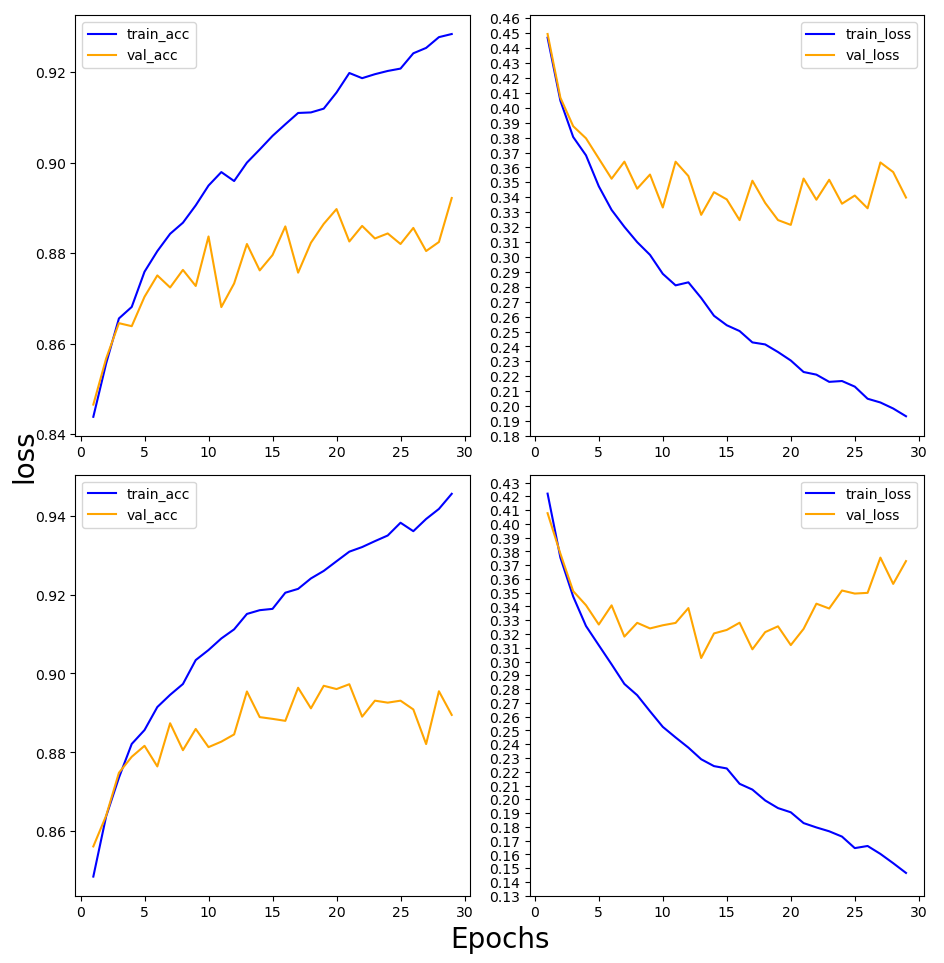

In [10]:
# 두 모델의 학습 과정 그려보기

import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color='blue', label='train_'+temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color='orange', label=val_temp)
        if(i==1 or i==3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_hitory, second_history, 30)
    